# Clustering en Python: Parte II (Clustering jerárquico y dendograma)

Vamos a ver un ejemplo de cómo podemos aplicar clustering jerárquico y generar un dendograma. 

Importamos los módulos que vamos a necesitar:
* para medir tiempos de ejecución: time
* para lectura y manejo de los datos: numpy y pandas
* para disponer de implementaciones de distintos algoritmos de clustering: cluster de Scikit-learn
* para normalizar el conjunto de datos: preprocessing de Scikit-learn
* para las visualizaciones y los dendogramas: matplotlib, seaborn y scipy

In [1]:
%matplotlib inline

In [2]:
import time

import pandas as pd
import numpy as np

from sklearn import cluster
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy


Creamos la función norm_to_zero_one para aplicar normalización min-max.

In [3]:
def norm_to_zero_one(df):
    return (df - df.min()) * 1.0 / (df.max() - df.min())

### Datos

Trabajamos sobre el conjunto de datos facilitado para la segunda práctica de la asignatura que contiene información recogida por el INE.

In [4]:
censo = pd.read_csv('censo_granada.csv')

Los valores en blanco en realidad son otra categoría que vamos a nombrar con el valor 0.

In [5]:
censo = censo.replace(np.NaN,0)

In [6]:
censo.shape

(83499, 142)

In [7]:
censo.columns.values

array(['CPRO', 'CMUN', 'IDHUECO', 'NORDEN', 'FACTOR', 'MNAC', 'ANAC',
       'EDAD', 'SEXO', 'NACI', 'CPAISN', 'CPRON', 'CMUNN', 'ANORES',
       'ANOM', 'ANOC', 'ANOE', 'CLPAIS', 'CLPRO', 'CLMUNP',
       'RES_ANTERIOR', 'CPAISUNANO', 'CPROUNANO', 'CMUNANO', 'RES_UNANO',
       'CPAISDANO', 'CPRODANO', 'CMUNDANO', 'RES_DANO', 'SEG_VIV',
       'SEG_PAIS', 'SEG_PROV', 'SEG_MUN', 'SEG_NOCHES', 'SEG_DISP',
       'ECIVIL', 'ESCOLAR', 'ESREAL', 'TESTUD', 'TAREA1', 'TAREA2',
       'TAREA3', 'TAREA4', 'HIJOS', 'NHIJOS', 'RELA', 'JORNADA', 'CNO',
       'CNAE', 'SITU', 'CSE', 'ESCUR1', 'ESCUR2', 'ESCUR3', 'LTRABA',
       'PAISTRABA', 'PROTRABA', 'MUNTRABA', 'CODTRABA', 'NVIAJE',
       'MDESP1', 'MDESP2', 'TDESP', 'TENEN', 'CALE', 'ASEO', 'BADUCH',
       'INTERNET', 'AGUACOR', 'SUT', 'NHAB', 'PLANTAS', 'PLANTAB',
       'TIPOEDIF', 'ANOCONS', 'ESTADO', 'ASCENSOR', 'ACCESIB', 'GARAJE',
       'PLAZAS', 'GAS', 'TELEF', 'ACAL', 'RESID', 'FAMILIA', 'PAD_NORDEN',
       'MAD_NORDEN', 'CON_NORD

Seleccionamos el caso de estudio, en este ejemplo concreto, aquellos casos para los que el campo 'EDADMAD' (grupo quinquenal de la edad de la madre) no estaba vacío.

In [8]:
subset = censo.loc[censo['EDADMAD']>0]

Seleccionamos variables de interés para clustering.

In [9]:
usadas = ['EDAD', 'ANORES', 'NPFAM', 'H6584', 'ESREAL']
X = subset[usadas]

Podemos comprobar las dimensiones (variables e instancias) del subconjunto seleccionado.

In [10]:
X.shape

(27207, 5)

Para sacar el dendrograma en el jerárquico, no podemos tener muchos elementos.
Hacemos un muestreo aleatorio para quedarnos solo con 1000, aunque lo ideal es elegir un caso de estudio que ya dé un tamaño pequeño.

In [11]:
X = X.sample(1000, random_state=123456)

En clustering hay que normalizar para las métricas de distancia. Normalizamos el dataframe aplicando la función 'norm_to_zero_one'. 
* 'apply' aplica una función a lo largo de un eje concreto de un dataframe. Por defecto el parámetro 'axis' tiene el valor cero lo que significa que la función se aplica a cada columna del dataframe.

In [12]:
X_normal = X.apply(norm_to_zero_one)

Podemos comprobar las dimensiones del subconjunto seleccionado con el que vamos a trabajar.

In [13]:
X_normal.shape

(1000, 5)

In [14]:
list(X_normal)

['EDAD', 'ANORES', 'NPFAM', 'H6584', 'ESREAL']

### Clustering Jerárquico

El clustering jerárquico engloba una familia de algoritmos que construyen clusters anidadas fusionándolos o dividiéndolos sucesivamente. Esta jerarquía de clusters se representa como un árbol (o dendrograma). La raíz del árbol es el cluster único que recoge todas las muestras, siendo las hojas del árbol los cluster que incluyen un solo dato o muestra.

El objeto 'AgglomerativeClustering' realiza un clustering jerárquico usando un enfoque 'de abajo a arriba': cada dato/muestra comienza en su propio cluster, y los clusters van fusionándose sucesivamente. En cada paso fusiona los dos clusters más cercanos (la definición de cercanos va a depender de la métrica elegida). Las opciones son:
* Ward: fusionar el par de cluster que genera un agrupamiento con mínima varianza (media de la distancia cuadrática de cada elemento al centroide)
* Maximum or complete linkage: minimiza la distancia máxima entre elementos de dos clusters.
* Average linkage: minimiza la distancia media entre elementos de dos clusters.
* Single linkage: minimiza la distancia mínima entre elementos de dos clusters.

Vamos a utilizar 'AgglomerativeClustering' con 'Ward' como criterio de enlace y eligiendo quedarnos con 100 clusters (100 ramificaciones del dendograma).

In [15]:
ward = cluster.AgglomerativeClustering(n_clusters=100, linkage='ward') # n_clusters: nº de clusters a encontrar
name, algorithm = ('Ward', ward)

Aplicamos el algoritmo de clustering jerárquico sobre nuestros datos (registrando el tiempo de ejecución).

In [16]:
cluster_predict = {}
k = {}

print(name,end='')
t = time.time()
cluster_predict[name] = algorithm.fit_predict(X_normal) 
tiempo = time.time() - t
k[name] = len(set(cluster_predict[name]))
print(": k: {:3.0f}, ".format(k[name]),end='')
print("{:6.2f} segundos".format(tiempo))

Ward: k: 100,   0.04 segundos


In [17]:
cluster_predict['Ward']

array([33, 61, 43, 12, 57, 37, 95,  7, 36, 30, 61, 27,  7, 36, 61, 20,  1,
       95, 82, 95, 12, 40, 61, 37, 40, 35, 98, 35, 33, 37, 20, 16, 10,  7,
       24,  2, 33,  7, 32, 95, 37,  2, 37,  1,  0, 85, 85, 37, 28, 37, 71,
       37, 87, 60, 44, 17, 18, 19,  7, 73, 36, 41, 33, 48,  0, 36, 43, 14,
       75, 28, 33, 16, 30, 65, 21,  1, 36,  8, 83, 23, 33, 30, 42, 98, 55,
       80, 28,  3, 33, 94, 75, 36,  7,  7, 92, 70, 45, 39, 16, 75,  1, 40,
       52, 21, 10, 17, 40, 23, 36, 12, 37, 12, 37, 28, 21,  2, 40, 40, 36,
       13,  7, 33, 95,  7, 33, 59, 28, 64, 28, 40, 51, 56, 12, 33, 37, 28,
       85, 61, 33, 30, 17, 28, 92, 33, 33, 43,  0, 37, 28, 52,  1, 95, 85,
       18, 24, 37, 23,  1,  0, 70, 10, 95, 43, 20, 92, 61, 15,  7, 49, 26,
        4, 61, 44, 24, 12, 61, 46, 43, 92, 28, 91,  6, 59, 64, 10, 62, 33,
       95, 33, 30,  7, 10, 17, 10, 11, 16,  1, 96, 10,  7, 35, 61,  7, 61,
       90, 21, 90, 95, 36, 36, 33,  1,  7, 42, 28, 11,  7, 22, 37, 37, 95,
       37, 17, 96, 87, 92

In [18]:
type(cluster_predict)

dict

In [19]:
type(cluster_predict['Ward'])

numpy.ndarray

In [20]:
cluster_predict['Ward'].shape

(1000,)

Convertimos la asignación de clusters a un DataFrame con una única columna 'cluster'.

In [21]:
clusters = pd.DataFrame(cluster_predict['Ward'],index=X.index,columns=['cluster'])

Añadimos la asignación de clusters a las variables de entrada que habíamos seleccionado para el clustering.

In [22]:
X_cluster = pd.concat([X, clusters], axis=1)

In [23]:
print(list(X_cluster))
print(X_cluster.shape)

['EDAD', 'ANORES', 'NPFAM', 'H6584', 'ESREAL', 'cluster']
(1000, 6)


Filtramos outliers quitando aquellos elementos que el algoritmo ha agrupado en clusters muy pequeños:
* usamos 'groupby' para generar grupos de instancias según el valor de la columna 'cluster', es decir, según el cluster asignado
* 'transform' devuelve un objeto que está indexado igual (mismo tamaño) que el objeto que está siendo agrupado (en este caso 'X_cluster')

https://pandas.pydata.org/pandas-docs/stable/groupby.html

In [24]:
min_size = 3
# Agrupamos las instancias de 'X_cluster' por el cluster asignado 
X_filtrado = X_cluster[X_cluster.groupby('cluster').cluster.transform(len) > min_size]

Para entender un poco mejor lo que está pasando en esa última línea de código, podemos ver los grupos de instancias generados por 'groupby'.

In [25]:
print(X_cluster.groupby('cluster').groups)

{0: Int64Index([14371, 51412, 78530, 30988, 6415, 28072, 68722, 81878, 53883,
            75314, 16863],
           dtype='int64'), 1: Int64Index([23582, 38202, 24612, 69235, 73230, 51732, 17212, 13518,  6087,
            32339, 79830, 51447, 79590, 52288,  6574, 76175,  6532, 79431,
            75775, 44872, 17180, 58702, 17628, 31644, 77018, 72129, 24292,
            51720, 59230, 71775, 17021, 17324, 44843, 65705, 17168, 59716,
             9896, 31959, 52503, 35004, 55655],
           dtype='int64'), 2: Int64Index([68937, 5648, 9145, 27598, 2459, 65033, 82093, 48096, 9132], dtype='int64'), 3: Int64Index([54269, 12430, 81675, 74907], dtype='int64'), 4: Int64Index([27192, 33874, 333, 30172, 15180, 7905], dtype='int64'), 5: Int64Index([962, 36467, 20400, 12544, 4952], dtype='int64'), 6: Int64Index([9601, 75041, 79817], dtype='int64'), 7: Int64Index([69729, 67531,  3987, 28672, 39396, 67687, 56101, 80652, 49671,
            49026,  3613,  4410, 32674, 76565, 67236, 24890, 67271, 49603,

Lo que queremos es saber la longitud (el número de instancias) de cada uno de los grupos. Si llamamos a la función 'len' con la salida de groupby como argumento ...

In [26]:
print(len(X_cluster.groupby('cluster')))

100


Usando 'transform' 'len' nos devuelve para cada instancia de 'X_cluster' la longitud (nº de instancias) del grupo en el que se ha incluido a esa instancia.

In [27]:
print(X_cluster.groupby('cluster').cluster.transform(len))

59950    52
32492    51
35390    21
58323    19
18734     5
67528    66
28466    28
69729    55
80558    30
51796     9
60359    51
64853     6
67531    55
22293    30
18962    51
7794      4
23582    41
52461    28
78321     4
13977    28
68922    19
35135    21
11216    51
43090    66
66369    21
25165    13
71607     4
51622    13
21488    52
60711    66
         ..
51218     4
42336    21
42850    29
11170    66
60438    66
66089     9
31045    46
60274    66
35004    41
37720    10
22677     6
28328    14
54482     6
49147    55
82204     9
72392    10
59146    29
27575     5
11574    55
78822    21
83443    22
54744     7
33680    21
40139    14
74644     4
76530    21
7173     28
55655    41
17818    46
25325     9
Name: cluster, Length: 1000, dtype: int64


Comprobamos cuántos clusters quedan después de haber eliminado aquellos que no llegaban al tamaño mínimo.

In [28]:
k_filtrado = len(set(X_filtrado['cluster']))
print("De los {:.0f} clusters hay {:.0f} con más de {:.0f} elementos. Del total de {:.0f} elementos, se seleccionan {:.0f}".format(k['Ward'],k_filtrado,min_size,len(X),len(X_filtrado)))

De los 100 clusters hay 69 con más de 3 elementos. Del total de 1000 elementos, se seleccionan 934


Eliminamos la columna con la asignación de cluster.
* drop permite eliminar una fila o columna de un DataFrame

In [29]:
X_filtrado = X_filtrado.drop('cluster', axis=1) # axis=1 para indicar que lo que queremos eliminar es una columna y no una fila
print(list(X_filtrado))

['EDAD', 'ANORES', 'NPFAM', 'H6584', 'ESREAL']


Normalizamos el conjunto filtrado. Volvemos a normalizar porque al eliminar outliers puede que los valores mínimos/máximos de algunas variables hayan cambiado.

In [30]:
X_filtrado_normal = X_filtrado.apply(norm_to_zero_one)

Obtenemos el dendograma usando scipy (que realmente va a volver a ejecutar el clustering jerárquico).

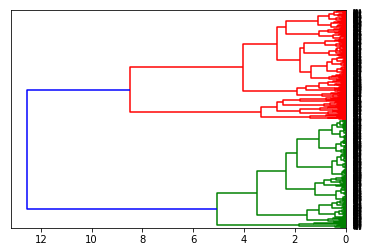

In [31]:
linkage_array = hierarchy.ward(X_filtrado_normal)
plt.figure(1)
plt.clf()
h_dict = hierarchy.dendrogram(linkage_array,orientation='left') #lo ponemos en horizontal para compararlo con el generado por seaborn

'h_dict' es un diccionario con información para representar el dendograma.

Generamos el dendograma usando seaborn (que a su vez usa scipy) para incluir un heatmap.

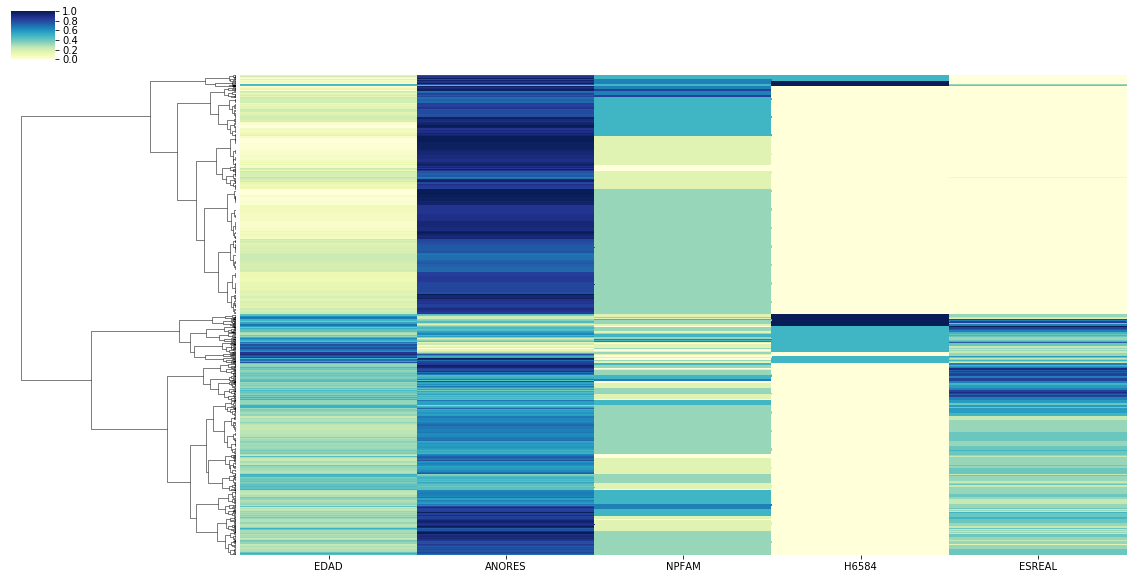

In [32]:
#Ahora lo saco usando seaborn (que a su vez usa scipy) para incluir un heatmap
sns.clustermap(X_filtrado_normal, method='ward', col_cluster=False, figsize=(20,10), cmap="YlGnBu", yticklabels=False)